## Importações

In [1]:
import geopandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import laspy

# from train_split import TrainSplit

## TranSplit

In [2]:
import geopandas
from shapely.geometry import Point, Polygon


class TrainSplit:
    @staticmethod
    def _get_records_in_plot_location(
        lidar_data: geopandas.GeoDataFrame, plot_location: geopandas.GeoDataFrame
    ) -> any:
        # return plot_location.contains(lidar_data)
        print(plot_location.items())
        return lidar_data.assign(
            **{key: lidar_data.within(geom) for key, geom in plot_location.items()}
        )

## Carregamento dos dados

In [40]:
las = laspy.read(
    "C:/Users/joaov/Documents/UFMG/TCC/Dataset/DUC_A01_2017_LiDAR/DUC_A01_2017_LAS/DUCL0003C0003.las"
)

In [4]:
lidar_dataset = pd.DataFrame(las.xyz, columns=["X", "Y", "Z"])

In [5]:
lidar_dataset.head()

,X,Y,Z
0,840000.76,9672998.97,80.94
1,840001.14,9672999.95,87.53
2,840001.11,9672999.67,87.74
3,840001.07,9672999.27,87.59
4,840001.02,9672998.86,87.41


In [6]:
geo_lidar_dataset = geopandas.GeoDataFrame(
    lidar_dataset,
    geometry=geopandas.points_from_xy(lidar_dataset.X, lidar_dataset.Y),
    crs="EPSG:32720",
)

In [7]:
geo_lidar_dataset.head()

,X,Y,Z,geometry
0,840000.76,9672998.97,80.94,POINT (840000.760 9672998.970)
1,840001.14,9672999.95,87.53,POINT (840001.140 9672999.950)
2,840001.11,9672999.67,87.74,POINT (840001.110 9672999.670)
3,840001.07,9672999.27,87.59,POINT (840001.070 9672999.270)
4,840001.02,9672998.86,87.41,POINT (840001.020 9672998.860)


In [8]:
inventory_plot_location = geopandas.read_file(
    "C:/Users/joaov/Documents/UFMG/TCC/Dataset/DUC_A01_2016_PLOTLOCATION/duc_a01_2016_plotlocation.shx"
)

In [9]:
inventory_plot_location.head()

,plot_ID,geometry
0,P20,"POLYGON ((840040.725 9674392.229, 840082.852 9..."
1,P02,"POLYGON ((840077.054 9674170.361, 840124.283 9..."
2,P07,"POLYGON ((840331.289 9673499.875, 840372.258 9..."
3,P09,"POLYGON ((840301.102 9673285.583, 840340.905 9..."
4,P08,"POLYGON ((839205.643 9673316.074, 839256.495 9..."


<Axes: >

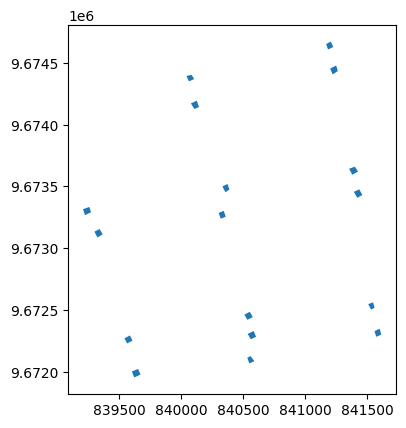

In [10]:
inventory_plot_location.plot()

In [11]:
# gdf = inventory_plot_location['geometry'].to_crs({'proj':'cea'}) 

In [12]:
# (gdf.area / 10**6).sum()

In [13]:
inventory = pd.read_csv(
    "C:/Users/joaov/Documents/UFMG/TCC/Dataset/DUC_A01_2016_inventory.csv",
    encoding="ISO-8859-1",
)

In [14]:
inventory.head()

,area,plot,tree,common.name,scientific.name,family.name,DBH,type,Dead,D.class,date,UTM.Easting,UTM.Northing
0,DUC_A01,2,001a,macucu,Licania guianensis,Chrysobalanaceae,49.6,O,False,NaN,20160824,840127.0705,9674180.998
1,DUC_A01,2,001b,uxirana,Sacoglottis guianensis,Humiriaceae,43.6,O,False,NaN,20160824,840098.9678,9674177.868
2,DUC_A01,2,002a,mapatirana,Pourouma minor,Urticaceae,31.5,O,False,NaN,20160824,840126.4377,9674180.705
3,DUC_A01,2,002b,abiurana,Pouteria gongrijpii,Sapotaceae,39.2,O,False,NaN,20160824,840109.4829,9674171.803
4,DUC_A01,2,003a,roxinho,Peltogyne lecointei,Fabaceae,10.0,O,False,NaN,20160824,840125.6847,9674181.313


In [15]:
inventory["plot"].unique()

array([ 2,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
      dtype=int64)

In [16]:
inventory_plot_location

,plot_ID,geometry
0,P20,"POLYGON ((840040.725 9674392.229, 840082.852 9..."
1,P02,"POLYGON ((840077.054 9674170.361, 840124.283 9..."
2,P07,"POLYGON ((840331.289 9673499.875, 840372.258 9..."
3,P09,"POLYGON ((840301.102 9673285.583, 840340.905 9..."
4,P08,"POLYGON ((839205.643 9673316.074, 839256.495 9..."
5,P11,"POLYGON ((839297.741 9673134.604, 839339.666 9..."
6,P10,"POLYGON ((841354.435 9673642.624, 841401.045 9..."
7,P12,"POLYGON ((841393.219 9673456.688, 841436.904 9..."
8,P04,"POLYGON ((841168.997 9674649.126, 841205.644 9..."
9,P05,"POLYGON ((841201.669 9674452.071, 841249.937 9..."


In [17]:
inventory_plot_location["polygon"] = inventory_plot_location["geometry"]

## Merge inventário com a região

In [18]:
geo_inventory_dataset = geopandas.GeoDataFrame(
    inventory,
    geometry=geopandas.points_from_xy(
        inventory["UTM.Easting"], inventory["UTM.Northing"]
    ),
    crs="EPSG:32720",
)

In [19]:
geo_inventory_dataset.head()

,area,plot,tree,common.name,scientific.name,family.name,DBH,type,Dead,D.class,date,UTM.Easting,UTM.Northing,geometry
0,DUC_A01,2,001a,macucu,Licania guianensis,Chrysobalanaceae,49.6,O,False,NaN,20160824,840127.0705,9674180.998,POINT (840127.071 9674180.998)
1,DUC_A01,2,001b,uxirana,Sacoglottis guianensis,Humiriaceae,43.6,O,False,NaN,20160824,840098.9678,9674177.868,POINT (840098.968 9674177.868)
2,DUC_A01,2,002a,mapatirana,Pourouma minor,Urticaceae,31.5,O,False,NaN,20160824,840126.4377,9674180.705,POINT (840126.438 9674180.705)
3,DUC_A01,2,002b,abiurana,Pouteria gongrijpii,Sapotaceae,39.2,O,False,NaN,20160824,840109.4829,9674171.803,POINT (840109.483 9674171.803)
4,DUC_A01,2,003a,roxinho,Peltogyne lecointei,Fabaceae,10.0,O,False,NaN,20160824,840125.6847,9674181.313,POINT (840125.685 9674181.313)


In [20]:
inventory_point_in_poly = geopandas.sjoin(
    geo_inventory_dataset,
    inventory_plot_location,
    predicate="within",
    lsuffix="left",
    rsuffix="right",
)

In [21]:
inventory_point_in_poly

,area,plot,tree,common.name,scientific.name,family.name,DBH,type,Dead,D.class,date,UTM.Easting,UTM.Northing,geometry,index_right,plot_ID,polygon
0,DUC_A01,2,001a,macucu,Licania guianensis,Chrysobalanaceae,49.6,O,False,NaN,20160824,840127.0705,9674180.998,POINT (840127.071 9674180.998),1,P02,"POLYGON ((840077.054 9674170.361, 840124.283 9..."
1,DUC_A01,2,001b,uxirana,Sacoglottis guianensis,Humiriaceae,43.6,O,False,NaN,20160824,840098.9678,9674177.868,POINT (840098.968 9674177.868),1,P02,"POLYGON ((840077.054 9674170.361, 840124.283 9..."
2,DUC_A01,2,002a,mapatirana,Pourouma minor,Urticaceae,31.5,O,False,NaN,20160824,840126.4377,9674180.705,POINT (840126.438 9674180.705),1,P02,"POLYGON ((840077.054 9674170.361, 840124.283 9..."
3,DUC_A01,2,002b,abiurana,Pouteria gongrijpii,Sapotaceae,39.2,O,False,NaN,20160824,840109.4829,9674171.803,POINT (840109.483 9674171.803),1,P02,"POLYGON ((840077.054 9674170.361, 840124.283 9..."
4,DUC_A01,2,003a,roxinho,Peltogyne lecointei,Fabaceae,10.0,O,False,NaN,20160824,840125.6847,9674181.313,POINT (840125.685 9674181.313),1,P02,"POLYGON ((840077.054 9674170.361, 840124.283 9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,DUC_A01,20,048a,quarubarana,Erisma uncinatum,Vochysiaceae,24.0,O,False,NaN,20160830,840072.5767,9674390.969,POINT (840072.577 9674390.969),0,P20,"POLYGON ((840040.725 9674392.229, 840082.852 9..."
1165,DUC_A01,20,049a,fava saboeiro,Abarema jupunba,Fabaceae,14.0,O,False,NaN,20160830,840071.0245,9674395.507,POINT (840071.025 9674395.507),0,P20,"POLYGON ((840040.725 9674392.229, 840082.852 9..."
1166,DUC_A01,20,050a,mamorana,Eriotheca globosa,Malvaceae,22.0,O,False,NaN,20160830,840069.0191,9674396.896,POINT (840069.019 9674396.896),0,P20,"POLYGON ((840040.725 9674392.229, 840082.852 9..."
1167,DUC_A01,20,051a,louro cheiroso,Diospyros artanthifolia,Ebenaceae,11.9,O,False,NaN,20160830,840069.1150,9674398.094,POINT (840069.115 9674398.094),0,P20,"POLYGON ((840040.725 9674392.229, 840082.852 9..."


## Encontrando os dados LiDAR no Inventário

In [22]:
lidar_point_in_poly = geopandas.sjoin(
    geo_lidar_dataset,
    inventory_plot_location,
    predicate="within",
    lsuffix="left",
    rsuffix="right",
)

In [23]:
lidar_point_in_poly

,X,Y,Z,geometry,index_right,plot_ID,polygon
4823033,840509.52,9672464.57,87.19,POINT (840509.520 9672464.570),12,P13,"POLYGON ((840509.278 9672464.809, 840552.329 9..."
4823034,840509.53,9672464.79,88.74,POINT (840509.530 9672464.790),12,P13,"POLYGON ((840509.278 9672464.809, 840552.329 9..."
4823035,840509.52,9672464.57,89.17,POINT (840509.520 9672464.570),12,P13,"POLYGON ((840509.278 9672464.809, 840552.329 9..."
4823036,840509.52,9672464.49,89.95,POINT (840509.520 9672464.490),12,P13,"POLYGON ((840509.278 9672464.809, 840552.329 9..."
4823037,840509.53,9672464.75,91.57,POINT (840509.530 9672464.750),12,P13,"POLYGON ((840509.278 9672464.809, 840552.329 9..."
...,...,...,...,...,...,...,...
17353415,840589.24,9672089.97,79.90,POINT (840589.240 9672089.970),14,P15,"POLYGON ((840532.221 9672116.314, 840558.148 9..."
17353416,840589.23,9672089.41,80.33,POINT (840589.230 9672089.410),14,P15,"POLYGON ((840532.221 9672116.314, 840558.148 9..."
17353417,840589.19,9672089.33,79.50,POINT (840589.190 9672089.330),14,P15,"POLYGON ((840532.221 9672116.314, 840558.148 9..."
17353418,840589.17,9672088.84,79.75,POINT (840589.170 9672088.840),14,P15,"POLYGON ((840532.221 9672116.314, 840558.148 9..."


In [24]:
lidar_point_in_poly["plot_ID"].unique()

array(['P13', 'P14', 'P15'], dtype=object)

## Analisando dados do inventário à nível de plot

In [38]:
geo_inventory_dataset.head()

,area,plot,tree,common.name,scientific.name,family.name,DBH,type,Dead,D.class,date,UTM.Easting,UTM.Northing,geometry
0,DUC_A01,2,001a,macucu,Licania guianensis,Chrysobalanaceae,49.6,O,False,NaN,20160824,840127.0705,9674180.998,POINT (840127.071 9674180.998)
1,DUC_A01,2,001b,uxirana,Sacoglottis guianensis,Humiriaceae,43.6,O,False,NaN,20160824,840098.9678,9674177.868,POINT (840098.968 9674177.868)
2,DUC_A01,2,002a,mapatirana,Pourouma minor,Urticaceae,31.5,O,False,NaN,20160824,840126.4377,9674180.705,POINT (840126.438 9674180.705)
3,DUC_A01,2,002b,abiurana,Pouteria gongrijpii,Sapotaceae,39.2,O,False,NaN,20160824,840109.4829,9674171.803,POINT (840109.483 9674171.803)
4,DUC_A01,2,003a,roxinho,Peltogyne lecointei,Fabaceae,10.0,O,False,NaN,20160824,840125.6847,9674181.313,POINT (840125.685 9674181.313)


In [39]:
(geo_inventory_dataset.groupby("plot")["D.class"].describe())

,count,mean,std,min,25%,50%,75%,max
plot,,,,,,,,
2,5.0,2.000000,1.414214,1.0,1.00,1.0,3.00,4.0
4,3.0,1.666667,0.577350,1.0,1.50,2.0,2.00,2.0
5,3.0,1.666667,0.577350,1.0,1.50,2.0,2.00,2.0
7,5.0,2.200000,1.095445,1.0,1.00,3.0,3.00,3.0
8,6.0,2.166667,1.329160,1.0,1.00,2.0,3.00,4.0
9,4.0,2.000000,1.154701,1.0,1.00,2.0,3.00,3.0
10,8.0,1.625000,0.517549,1.0,1.00,2.0,2.00,2.0
11,2.0,3.500000,0.707107,3.0,3.25,3.5,3.75,4.0
12,2.0,1.500000,0.707107,1.0,1.25,1.5,1.75,2.0


In [34]:
(geo_inventory_dataset.groupby("plot")["DBH"].describe())

,count,mean,std,min,25%,50%,75%,max
plot,,,,,,,,
2,54.0,28.120370,16.459698,10.0,16.025,23.35,39.100,91.1
4,77.0,24.318182,15.867765,10.0,12.000,16.80,35.200,73.9
5,60.0,24.008333,16.476098,10.6,14.450,18.55,24.225,100.0
7,81.0,27.781481,17.260353,10.1,14.200,21.90,38.700,94.5
8,66.0,25.737879,17.031670,10.2,13.650,18.30,34.800,98.8
9,77.0,25.261039,15.022914,3.9,13.000,19.70,33.500,75.7
10,87.0,22.748276,13.120035,10.4,13.250,18.40,29.350,76.5
11,62.0,23.829032,15.445540,10.0,12.550,16.75,29.525,65.8
12,67.0,26.750746,16.712583,10.0,12.900,22.70,35.800,90.0
